In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import cv2



In [7]:
# Path dataset
DATA_PATH = 'CNN_dataset_hand_pose_V4'
IMG_SIZE = (64, 64)  # Ukuran gambar yang digunakan untuk CNN

def load_data():
    X, y = [], []
    gestures = os.listdir(DATA_PATH)
    label_map = {gesture: i for i, gesture in enumerate(gestures)}
    
    for gesture in gestures:
        gesture_path = os.path.join(DATA_PATH, gesture)
        for sequence in os.listdir(gesture_path):
            sequence_path = os.path.join(gesture_path, sequence)
            for file in os.listdir(sequence_path):
                if file.endswith('-cropped.jpg'):
                    img_path = os.path.join(sequence_path, file)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, IMG_SIZE)
                    img = img / 255.0  # Normalisasi
                    X.append(img)
                    y.append(label_map[gesture])
    
    X = np.array(X).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)  # Tambahkan channel dimensi
    y = to_categorical(np.array(y), num_classes=len(gestures))
    return X, y, label_map



Epoch 1/20


C:\Users\Ardy Pratama\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.1508 - loss: 2.2617 - val_accuracy: 0.3111 - val_loss: 2.1183
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3467 - loss: 2.0448 - val_accuracy: 0.5444 - val_loss: 1.6867
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5686 - loss: 1.5462 - val_accuracy: 0.8778 - val_loss: 0.9008
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7383 - loss: 0.8924 - val_accuracy: 0.8778 - val_loss: 0.4910
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8998 - loss: 0.4274 - val_accuracy: 0.9222 - val_loss: 0.2957
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9117 - loss: 0.3104 - val_accuracy: 0.9000 - val_loss: 0.2543
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9332 - loss: 0.2286 - val_accuracy: 0.9333 - val_loss: 0.2249
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9294 - loss: 0.2165 - val_accuracy: 0.9667 - val_loss: 0.

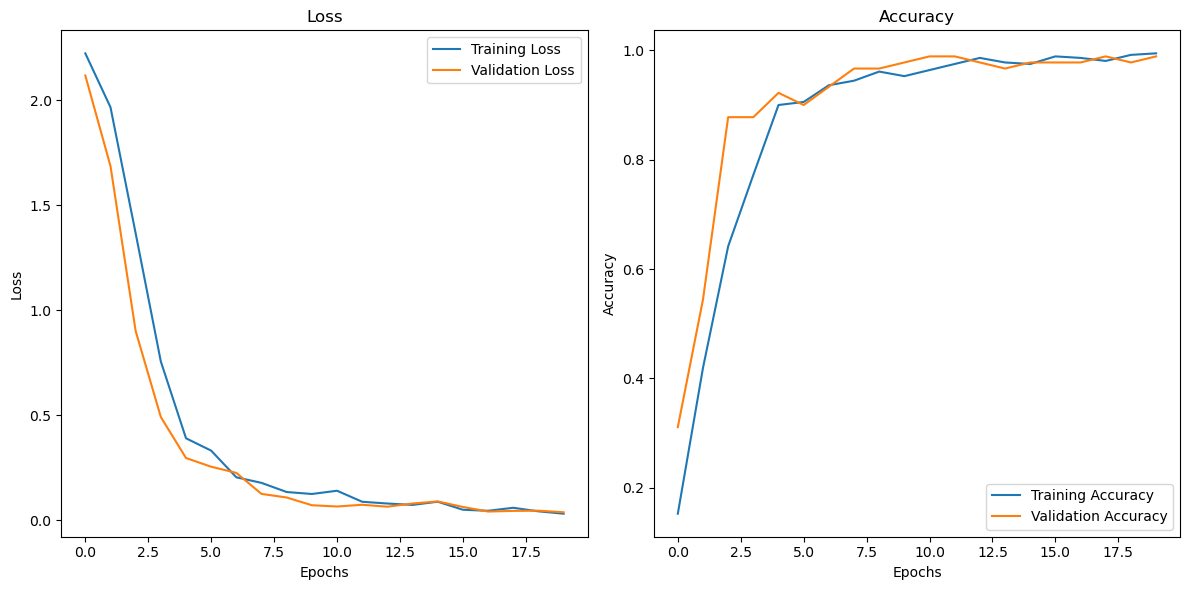

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Classification Report:

              precision    recall  f1-score   support

        Atas       0.92      1.00      0.96        12
       Bawah       1.00      1.00      1.00        14
       Kanan       1.00      1.00      1.00         9
        Kiri       1.00      0.86      0.92         7
        Maju       1.00      1.00      1.00         8
      Mundur       1.00      1.00      1.00         8
 Putar_kanan       1.00      1.00      1.00         6
  Putar_kiri       1.00      1.00      1.00        14
   Start_End       1.00      1.00      1.00        12

    accuracy                           0.99        90
   macro avg       0.99      0.98      0.99        90
weighted avg       0.99      0.99      0.99        90



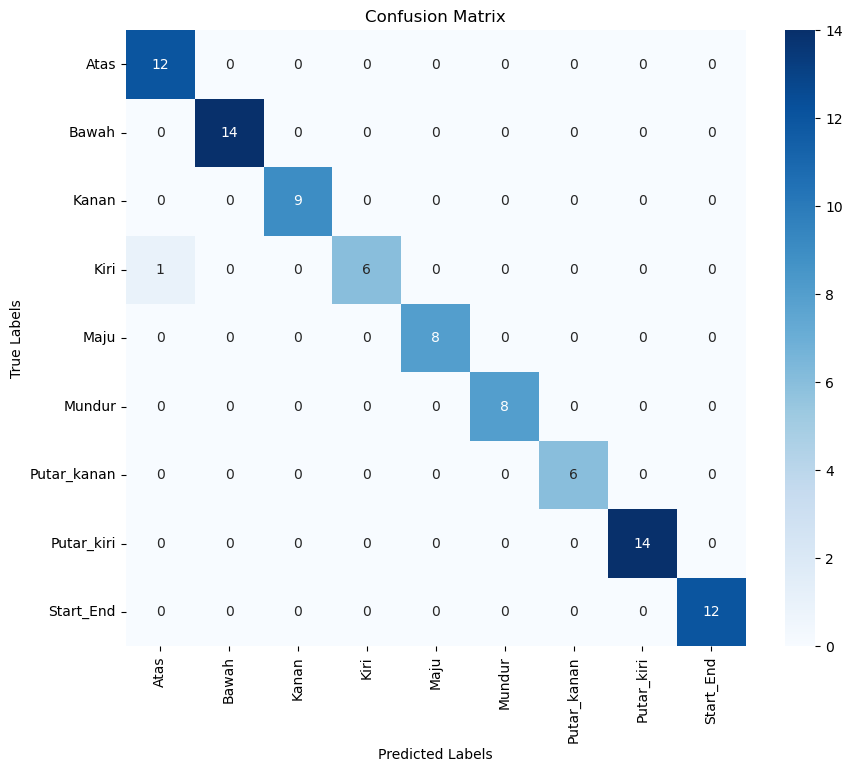

In [8]:
# Load dataset
X, y, label_map = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(label_map), activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train model
model = build_model()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot Loss and Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=label_map.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [9]:
# Save model
model.save('model/cnn_hand_pose_model_V1.h5')
print("Model trained and saved successfully!")

Model trained and saved successfully!


In [5]:
# Konversi model ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite
tflite_model_path = 'model/cnn_hand_pose_model_V1.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model TFLite telah disimpan di {tflite_model_path}")


INFO:tensorflow:Assets written to: C:\Users\ARDYPR~1\AppData\Local\Temp\tmpqygoizmt\assets


INFO:tensorflow:Assets written to: C:\Users\ARDYPR~1\AppData\Local\Temp\tmpqygoizmt\assets


Saved artifact at 'C:\Users\ARDYPR~1\AppData\Local\Temp\tmpqygoizmt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  1539698541008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1539698542736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1539698542928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1539698541200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1539698540816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1539698543696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1539698543120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1539698544272: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model TFLite telah disimpan di model/cnn_hand_pose_model_V1.tflite
